# Polynomial Regression Example
This notebook will show an example of using linear regression to find the coefficients of polynomial data (y = a0 + a1*x + a2*x^2 + a3*x^3).

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt # Plotting graphs.
import pandas as pd # Data manipulation.
import seaborn as sns; sns.set() # Only used for styling plots.
import numpy as np # Arrays and matrices.
import random # Generating data and error values.

from sklearn.pipeline import Pipeline # Polynomial regression tools.
from sklearn.preprocessing import PolynomialFeatures # Polynomial regression tools.
from sklearn.model_selection import train_test_split # Data tools.
from sklearn.linear_model import LinearRegression # Linear regression.
from sklearn import metrics # Scoring our model.

%matplotlib inline

print("Imports Finished.")

Imports Finished.


## Data Generation

In [2]:
# These are the "secret" coefficients that linear regression will try to find.
a0 = -25.8234
a1 = 9.1845
a2 = -0.559
a3 = 0.004

random.seed(91)

# Generate evenly spaced x values in a list.
x_range = 100
x_length = 100
myset_array = np.linspace(0, x_range, x_length)

# Generate random error values in a list.
error_range = 200
error = random.sample(range(error_range), k=x_length)
error_array = np.array(error)

# Assemble and Transpose the data.
data = [myset_array, error_array]
dataT = np.transpose(data)

# Assemble these lists into a pandas dataframe.
df = pd.DataFrame(dataT, columns = ["x", "e"])

# Modify the error values so they have a mean of zero.
diff = error_range // 2
df["e"] = df["e"] - diff

# Add additional columns for a0 and a1 into the dataframe.
df["a0"] = a0
df["a1"] = a1
df["a2"] = a2
df["a3"] = a3

# Calculate y values with the formula: y = a0 + a1*x + a2*x^2 + a3*x^3 + e
df["y_observed"] = df["a0"] + \
        df["a1"] * df["x"] + \
        df["a2"] * df["x"] * df["x"] + \
        df["a3"] * df["x"] * df["x"] * df["x"] + \
        df["e"]

# Also calculate the true y values (no error term).
df["y_ground_truth"] = df["y_observed"] - df["e"]

# Print dataframe.
df.head()

,x,e,a0,a1,a2,a3,y_observed,y_ground_truth
0,0.000000,-79.0,-25.8234,9.1845,-0.559,0.004,-104.823400,-25.823400
1,1.010101,51.0,-25.8234,9.1845,-0.559,0.004,33.887645,-17.112355
2,2.020202,-56.0,-25.8234,9.1845,-0.559,0.004,-65.517275,-9.517275
3,3.030303,75.0,-25.8234,9.1845,-0.559,0.004,71.986574,-3.013426
4,4.040404,73.0,-25.8234,9.1845,-0.559,0.004,75.423928,2.423928


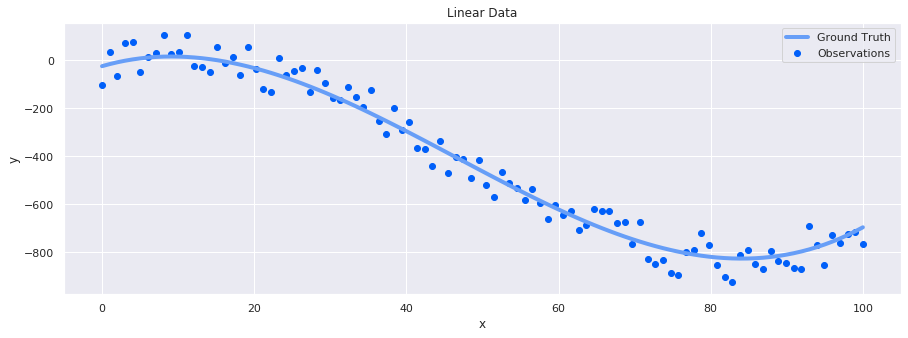

In [3]:
# Plot the results.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

axes.set_title("Linear Data")
axes.set_ylabel("y")
axes.set_xlabel("x")
axes.scatter(df["x"], df["y_observed"], color="#005ff9")
axes.plot(df["x"], df["y_ground_truth"], color="#679ef7", linewidth=4)
axes.legend(["Ground Truth", "Observations"], loc="upper right")

## Polynomial Regression (Training)

In [4]:
# Split the data into dependent and independent variables.
x = df["x"]
y = df["y_observed"]

# Divide the data up for training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9)

In [5]:
# Create the model.
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True))])

# Train the model.
model = model.fit(x_train[:, np.newaxis], y_train)

# Extract predicted coefficients.
a0_pred = model.named_steps['linear'].coef_[0]
a1_pred = model.named_steps['linear'].coef_[1]
a2_pred = model.named_steps['linear'].coef_[2]
a3_pred = model.named_steps['linear'].coef_[3]

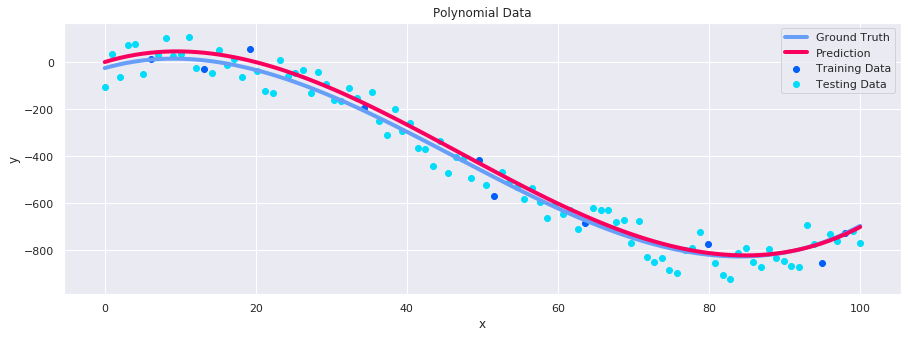

In [6]:
# Generate the fitted line.
df["y_pred"] = a0_pred + a1_pred * df["x"] + \
        a2_pred * df["x"] * df["x"] + a3_pred * df["x"] * df["x"] * df["x"]

# Plot the results.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

axes.set_title("Polynomial Data")
axes.set_ylabel("y")
axes.set_xlabel("x")
axes.scatter(x_train, y_train, color="#005ff9")
axes.scatter(x_test, y_test, color="#00dcf9")
axes.plot(df["x"], df["y_ground_truth"], color="#679ef7", linewidth=4)
axes.plot(df["x"], df["y_pred"], color="#f9005f", linewidth=4)
axes.legend(["Ground Truth", "Prediction", "Training Data", "Testing Data"], loc="upper right")

## Measuring Model Performance (Testing)

In [7]:
# How far off were the coefficients from their true values?
a0_error = a0_pred - a0
a1_error = a1_pred - a1
a2_error = a2_pred - a2
a3_error = a3_pred - a3
print("a0_error:", a0_error)
print("a1_error:", a1_error)
print("a2_error:", a2_error)
print("a3_error:", a3_error)
print(" ")

# What was the mean squared error on the Training Data?
predictions = model.predict(x_train[:, np.newaxis])
mse_train = metrics.mean_squared_error(y_train[:, np.newaxis], predictions)
print("mse_train:", mse_train)

# What was the mean squared error on the Testing Data?
predictions = model.predict(x_test[:, np.newaxis])
mse_test = metrics.mean_squared_error(y_test[:, np.newaxis], predictions)
print("mse_test:", mse_test)

a0_error: 25.8234
a1_error: 0.7054710160042585
a2_error: -0.017956484767423286
a3_error: 7.841541864743364e-05
 
mse_train: 2431.28757262365
mse_test: 2848.043024623381


## Conclusion

When we look at mean squared error for the training and testing datasets, we see that the error is usually larger for the testing data. This intuitively makes sense because our model has not seen this data beforehand.

In [8]:
df.describe()

,x,e,a0,a1,a2,a3,y_observed,y_ground_truth,y_pred
count,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,50.000000,-0.940000,-2.582340e+01,9.184500e+00,-5.590000e-01,4.000000e-03,-430.181498,-429.241498,-408.499920
std,29.304537,54.102002,4.284734e-14,1.249714e-14,8.926529e-16,2.615194e-18,335.682283,321.721038,332.491768
min,0.000000,-99.000000,-2.582340e+01,9.184500e+00,-5.590000e-01,4.000000e-03,-925.138363,-827.792719,-823.226948
25%,25.000000,-47.250000,-2.582340e+01,9.184500e+00,-5.590000e-01,4.000000e-03,-738.879770,-757.202355,-748.999020
50%,50.000000,1.000000,-2.582340e+01,9.184500e+00,-5.590000e-01,4.000000e-03,-482.169540,-464.087942,-438.081856
75%,75.000000,39.250000,-2.582340e+01,9.184500e+00,-5.590000e-01,4.000000e-03,-86.807774,-83.135835,-49.675539
max,100.000000,98.000000,-2.582340e+01,9.184500e+00,-5.590000e-01,4.000000e-03,104.701223,14.478967,45.290647
